# <center>GRIP - The Spark Foundation</center>
<img src='https://media.glassdoor.com/sqll/2143300/the-sparks-foundation-squarelogo-1556515236044.png' width="100" height="100">

### <center><font color=7E4456>Data Science and Business Analytics Internship</font></center>  
### <center><font color=7E4456>By Khushboo Hiten Lodaya</font></center>

<font color=155E64>Prediction using Supervised ML</font>

<font color=155E64>(Level - Beginner)</font>

<font color=155E64>Task 1 : Simple Linear Regression</font>

<font color=155E64>Problem Statement: Predict the percentage of marks of a student based on the number of hours studied</font>

<font color=155E64>Dataset : http://bit.ly/w-data</font>

### Importing all the required libraries

In [1]:
import pandas as pd # storing and manipulating data
import numpy as np # mathematical computation on arrays and matrices 
import seaborn as sns # visualisation
import matplotlib.pyplot as plt  # visualisation
%matplotlib inline

### Importing data and converting into dataframe

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Study about the data

In [3]:
df.shape # shows the number of rows and columns the dataset contains

(25, 2)

In [4]:
df.describe() # summary of data (box plot)

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.info() # description of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Data Visualization

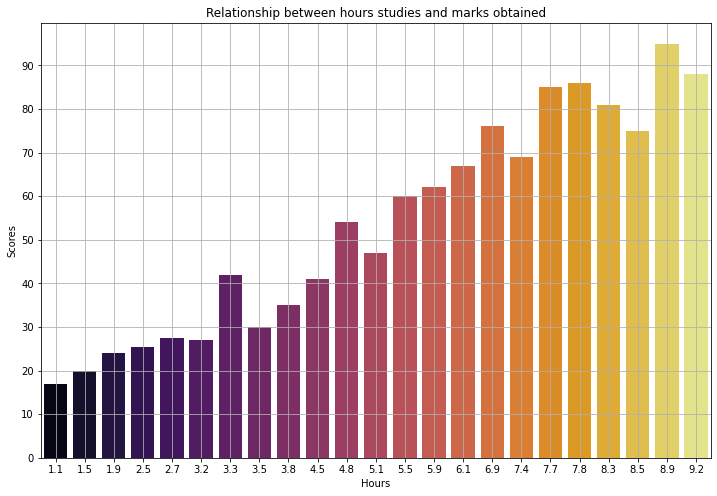

In [6]:
# Barplot to visualize relationship between hours studied and percentage obtained
fig=plt.figure(figsize=(12,8))
plt.title('Relationship between hours studies and marks obtained')
plt.yticks(np.arange(0, 100,10))
sns.barplot(x=df['Hours'], y=df['Scores'], data=df,ci = None, palette = 'inferno')
plt.grid()

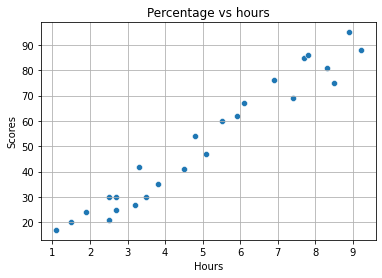

In [8]:
# Scatterplot clearly shows the positive linear relationship i.e as the number of study hours increases percentage increases 
sns.scatterplot(data = df, x = "Hours", y = "Scores")
plt.title('Percentage vs hours')
plt.grid()

### Dividing the data into input and output 

In [25]:
X = df.iloc[:, :-1].values  # input data
y = df.iloc[:, -1].values  # output data
print(X)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


### Spliting the data into training data and testing data
The train_test_split data accepts three arguments:
- X array
- y array
- desired size of our test data

In [10]:
# We have divided the data as 75% training data and 25% testing data
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.25, random_state=0) 

### Building and training the model

In [11]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression() # object creation  
model.fit(X_train, y_train) 
print('Data Trained Successfully')

Data Trained Successfully


###  Model's coefficient and intercept 

In [12]:
m = model.coef_
print(m) # slope of line
c = model.intercept_
print(c) # intercept of line

[9.94167834]
1.932204253151646


### Regression Line

Text(0, 0.5, 'Percentage')

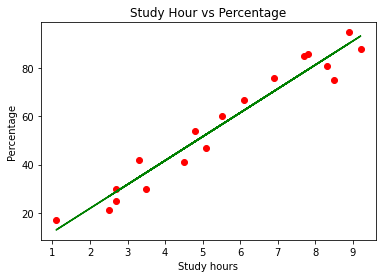

In [13]:
#visualization of training data
line = (m*X_train) + c
plt.scatter(X_train, y_train, color ='red')
plt.plot(X_train, line, color = 'green')
plt.title('Study Hour vs Percentage')
plt.xlabel("Study hours")
plt.ylabel("Percentage")

Text(0, 0.5, 'Percentage')

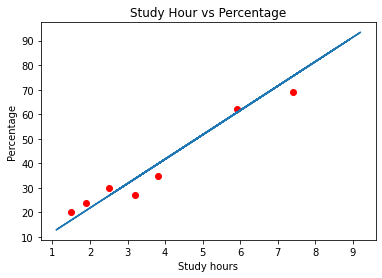

In [14]:
#visualization of test data
plt.scatter(X_test, y_test, color ='red')
plt.plot(X_train, line)
plt.title('Study Hour vs Percentage')
plt.xlabel("Study hours")
plt.ylabel("Percentage")

### Predicting the scores 

In [15]:
print(X_test)
predictions = model.predict(X_test)
print(predictions)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]
[16.84472176 33.74557494 75.50062397 26.7864001  60.58810646 39.71058194
 20.8213931 ]


### Comparision between actual and predicted scores

In [16]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})  
df1

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


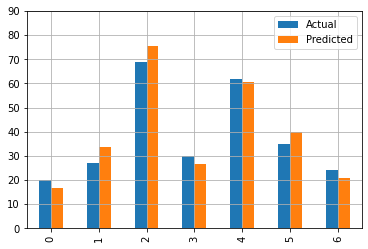

In [17]:
df1.plot(kind='bar')
plt.yticks(np.arange(0, 100,10))
plt.grid()

### Testing with our own data

In [19]:
var = [[9.25]]
x_test = var
y_predicted = model.predict(x_test)
print("For study hour 9.25 marks are:", y_predicted)

For study hour 9.25 marks are: [93.89272889]


In [27]:
def score_prediction():
    x=float(input('Enter hours studied to predict scores: '))
    hours = x
    test = np.array([hours])
    test = test.reshape(-1, 1)
    y_predicted = model.predict(test)
    print("\nNo of Hours = {}".format(hours))
    print("Score Predicted = {}".format(round(y_predicted[0]),2))
score_prediction()   

Enter hours studied to predict scores: 7.5

No of Hours = 7.5
Score Predicted = 76.0


### Model Evaluation

In [21]:
from sklearn import metrics  

In [22]:
# r2 metric is used to find the accuracy of the model
accuracy = metrics.r2_score(y_test, predictions) 
print('Accuracy of the model is', round(accuracy*100,2),'%') 

# mse is used to find diff between actual and predicted values 
print('Mean Squared Error of the model is',metrics.mean_squared_error(y_test, predictions))
print('Mean Absolute Error of the model is',metrics.mean_absolute_error(y_test, predictions))

#rmse is used to find the distance between actual and predicted value
print('Root Mean Square Error of the model is',np.sqrt(metrics.mean_absolute_error(y_test, predictions)))

Accuracy of the model is 93.68 %
Mean Squared Error of the model is 20.33292367497997
Mean Absolute Error of the model is 4.130879918502486
Root Mean Square Error of the model is 2.0324566215549313
